# HW 1 - Simon Lidwell

## Task 3 - EDA
### Read In Data From File

In [203]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# read in our data from the clean data folder
classification_df = pd.read_csv("data/kc_house_data_classification.csv")

In [205]:
classification_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


In [206]:
classification_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  price_

### Do some Automated EDA Using Sweetviz

In [207]:
import sweetviz
import tqdm as notebook_tqdm

Sweetviz threw a warning saying to import tqdm as notebook_tqdm and then the warning went away

In [208]:
report = sweetviz.analyze(classification_df)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


I had a weird error where it said numpy didn't contain warnings, so I saw on Stack that I needed to downgrade my numpy version... Which lead to an error saying that my python version was too new to downgrade to 1.23.1  which is what worked for other people. However, I had a previous version of python installed outside of the aap virtual env, so I just pip installed what was needed and then went from there...

In [209]:
report.show_html("output/sweetviz_report.html")

Report output/sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Some more "Manual" EDA

In [210]:
classification_df.groupby(['price_gt_1M']).size()

price_gt_1M
0    20121
1     1492
dtype: int64

So there are 1492 houses over $1 million in this data set and 20121 houses under $1 million

In [211]:
classification_df['price_gt_1M'].value_counts(normalize=True)

0    0.930967
1    0.069033
Name: price_gt_1M, dtype: float64

a house that is over $1 million appears in 6.9% of the data, while the other 93.1% of the data is all houses below $1 million

## Task 4 - Categorize Feature Types

Convert columns that are categorical to list, I got the columns from my sweetviz report and then I use list comprehension to filter them out from the numeric columns

In [212]:
category_list = [
    "floors"
    , "waterfront"
    , "view"
    , "condition"
]

numeric_list = [k for k in classification_df if k not in category_list and k != 'price_gt_1M']

print(numeric_list)

print(category_list)

all_cols = classification_df.columns.tolist()

print(all_cols)

classification_df.info()

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
['floors', 'waterfront', 'view', 'condition']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_gt_1M']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-nul

Get index positions of columns for later

In [213]:
cat_cols_idx = [classification_df.columns.get_loc(c) for c in category_list]
num_cols_idx = [classification_df.columns.get_loc(c) for c in numeric_list]

print(cat_cols_idx)
print(num_cols_idx)

[4, 5, 6, 7]
[0, 1, 2, 3, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


## Task 4 - Logistic Regression Models

### Task 4 Pre-Work

Here I'm doing things like setting up the preprocessing and doing all the sklearn imports that we are going to need to do this assignment

In [214]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split

In [215]:
numeric_transformer = StandardScaler()

In [216]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

Since these two transformers make up the steps we need to take in preprocessing, lets pass them into `ColumnTransformer()`

In [217]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols_idx),
        ('cat', categorical_transformer, cat_cols_idx)
    ]
)

Create our classifier model -- Logistic Regression

In [218]:
clf_model = LogisticRegression(C=1, penalty='l2', solver='saga', max_iter=500)

In [219]:
# Now we need to append our classifier to the preprocessing pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', clf_model)
]
)

In [220]:
# generate a little picture of the pipeline
from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  [0, 1, 2, 3, 8, 9, 10, 11, 12,
                                                   13, 14, 15, 16, 17]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [4, 5, 6, 7])])),
                ('classifier',
                 LogisticRegression(C=1, max_iter=500, solver='saga'))])

The above is pretty cool, visually see our 'pipeline' that we have constructed

In [221]:
# this is just something I stole from a screencast in the pump it up project
# not sure if I'm actually going to need this or not
x = classification_df.iloc[:, 0:18]
y = classification_df.iloc[:, 18]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=14)

Stochastic gradient descent - this is the optimization algorithm being used so we get that convergence warning after doing `clf.fit(X_train, y_train)`

In [222]:
# fit model on new training data
clf.fit(X_train, y_train)

c:\Users\slidw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  [0, 1, 2, 3, 8, 9, 10, 11, 12,
                                                   13, 14, 15, 16, 17]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [4, 5, 6, 7])])),
                ('classifier',
                 LogisticRegression(C=1, max_iter=500, solver='saga'))])

In [223]:
print("Training score : %.3f" % clf.score(X_train, y_train))
print("Test score : %.3f" % clf.score(X_test, y_test))

Training score : 0.963
Test score : 0.957


We are getting a score of 0.957 on the test data...

Lets try the Lasso Penalty with C = 0.001

In [224]:
clf_model_l1_C001 = LogisticRegression(penalty='l1', C=0.001, solver='saga', max_iter=500)

clf_l1_C001 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', clf_model)])

clf_l1_C001.fit(X_train, y_train)

print("Training score : %.3f" % clf_l1_C001.score(X_train, y_train))
print("Test score : %.3f" % clf_l1_C001.score(X_test, y_test))

Training score : 0.963
Test score : 0.957


c:\Users\slidw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Again, we got the same values... something doesn't seem correct but I'm not sure what it is

### Lets get more into the assignment here with Model 0: The Null Model

DummyClassifier makes predictions that ignore the input features.

This classifier serves as a simple baseline to compare against other more complex classifiers.

In [225]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")

# fit dummy model on training data
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [226]:
dummy_clf.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [227]:
dummy_clf.score(X_train, y_train)

0.9331405436668595

#### Model 1: Ridge regression with C=1.0

Here we create our l2 regularization model. Ridge regression is a model tuning method that is used to analyze any data that suffers from multicollinearity. This method performs l2 regularization so we fit it with that penalty

In [228]:
clf_model_C01 = LogisticRegression(penalty='l2', C=1.0, solver='saga', max_iter=2000)

clf_C01 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', clf_model)])

clf_C01.fit(X_train, y_train)

print("Training score : %.3f" % clf_C01.score(X_train, y_train))
print("Test score : %.3f" % clf_C01.score(X_test, y_test))

Training score : 0.963
Test score : 0.957


c:\Users\slidw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Now lets create our confusion matrix... we're going to steal sklearns metrics method

In [235]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


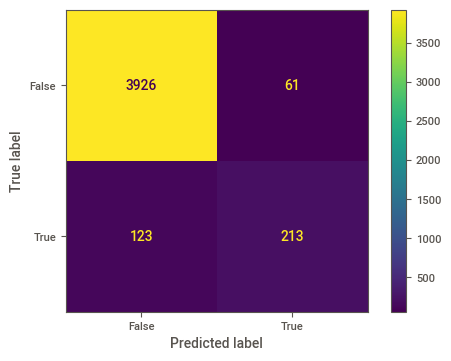

In [240]:
from sklearn import metrics

y_pred = clf_C01.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

cm_display.plot()

plt.show()

#### Model 2: Lasso regression with C=1.0